In [1]:
%%capture
from datetime import datetime as dt, timedelta
import pandas as pd
from LSTM_Net import LSTM_Model
from Processing import prepare_data
import warnings
warnings.filterwarnings("ignore")
import numpy as np
%matplotlib inline

In [2]:
input_file = 'data/chilectra.csv'
df = pd.read_csv(input_file)
all_X = prepare_data(df, hours_prior=24)

In [3]:
all_y = df['load'][24:]

In [4]:
predictions, model, history = LSTM_Model(all_X, all_y, hours_prior=24, EPOCHS=10)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 1)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 20)           1760        input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 49)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 40)           840         lstm[0][0]                       
______________________________________________________________________________________________

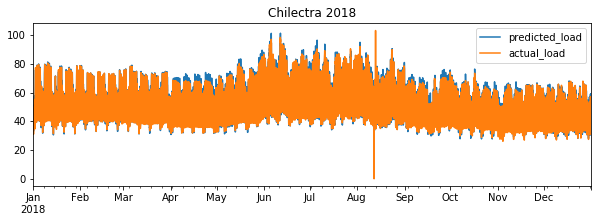

In [5]:
df_r = pd.DataFrame()
df_r['predicted_load'] = predictions
df_r['actual_load'] = [float(f) for f in all_y[-8760:]]
df_r.index = [dt(2018, 1, 1, 0) + timedelta(hours=1)*i for i in range(8760)]
df_r.plot(figsize=(10, 3), title="Chilectra 2018")

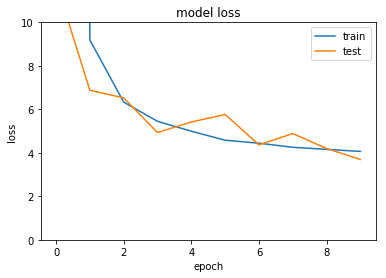

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,10)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


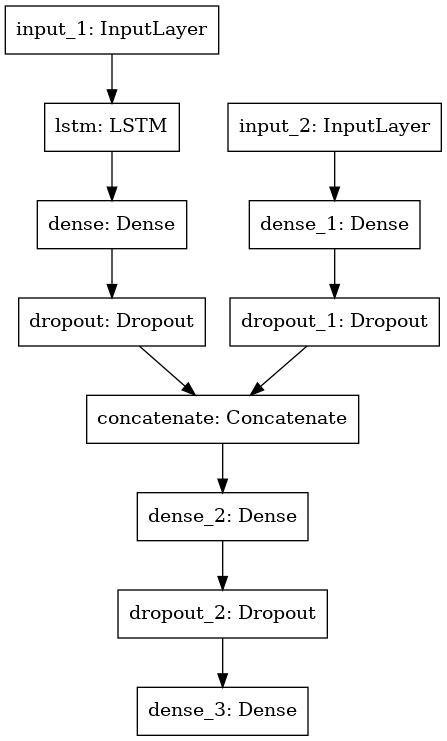

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')